In [1]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# SplineInteract.py  Spline fit

import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
x = np.array([0., 0.12, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 0.99])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
n = 9

In [4]:
# Initialize
y2 = np.zeros_like(y)
u = np.zeros_like(y)

Nfit = 100 # Original algorithm did Nfit + 1 points instead

Xfit = np.zeros((Nfit), float)
Yfit = np.zeros((Nfit), float)

yp1 = (  (y[1] - y[0]) / (x[1] - x[0])
       - (y[2] - y[1]) / (x[2] - x[1])
       + (y[2] - y[0]) / (x[2] - x[0]))

ypn = (  (y[-1] - y[-2]) / (x[-1] - x[-2])
       - (y[-2] - y[-3]) / (x[-2] - x[-3])
       + (y[-1] - y[-3]) / (x[-1] - x[-3]))

if yp1 > 0.99e30:
    y2[0] = 0.
    u[0] = 0.

else:
    y2[0] = -0.5
    u[0] = 3 / (x[1] - x[0]) * ((y[1] - y[0]) / (x[1] - x[0]) - yp1)
    
for i in range(1, n - 1):  # Decomp loop
    sig = (x[i] - x[i - 1]) / (x[i + 1] - x[i - 1])
    p = sig * y2[i - 1] + 2.
    y2[i] = (sig - 1.) / p
    u[i] = (  (y[i + 1] - y[i]) / (x[i + 1] - x[i])
            - (y[i] - y[i - 1]) / (x[i] - x[i - 1]))
    
    u[i] = (6. * u[i] / (x[i + 1] - x[i - 1]) - sig * u[i - 1]) / p
    
if ypn > 0.99e30:  # Test for natural
    qn = un = 0.
else:
    qn = 0.5
    un = 3 / (x[-1] - x[-2]) * (ypn - (y[-1] - y[-2]) / (x[-1] - x[-2]))
    
y2[-1] = (un - qn * u[-2]) / (qn * y2[-2] + 1)

for k in range(n - 2, 1, -1):
    y2[k] = y2[k] * y2[k + 1] + u[k]
    
for i in range(Nfit):  # Begin fit
    xout = x[0] + (x[-1] - x[0]) * i / (Nfit-1)
    klo = 0  # Bisection algor
    khi = n - 1
    while khi - klo > 1:
        k = khi + klo >> 1
        if x[k] > xout:
            khi = k
        else:
            klo = k
            
    h = x[khi] - x[klo]
    
    if x[k] > xout:
        khi = k
    else:
        klo = k
    
    h = x[khi] - x[klo]
    a = (x[khi] - xout) / h
    b = (xout - x[klo]) / h
    yout = a * y[klo] + b * y[khi] + (  (a * a * a - a) * y2[klo]
                                      + (b * b * b - b) * y2[khi]) * h * h / 6
    
    Xfit[i] = xout
    Yfit[i] = yout

In [5]:
from scipy.interpolate import CubicSpline

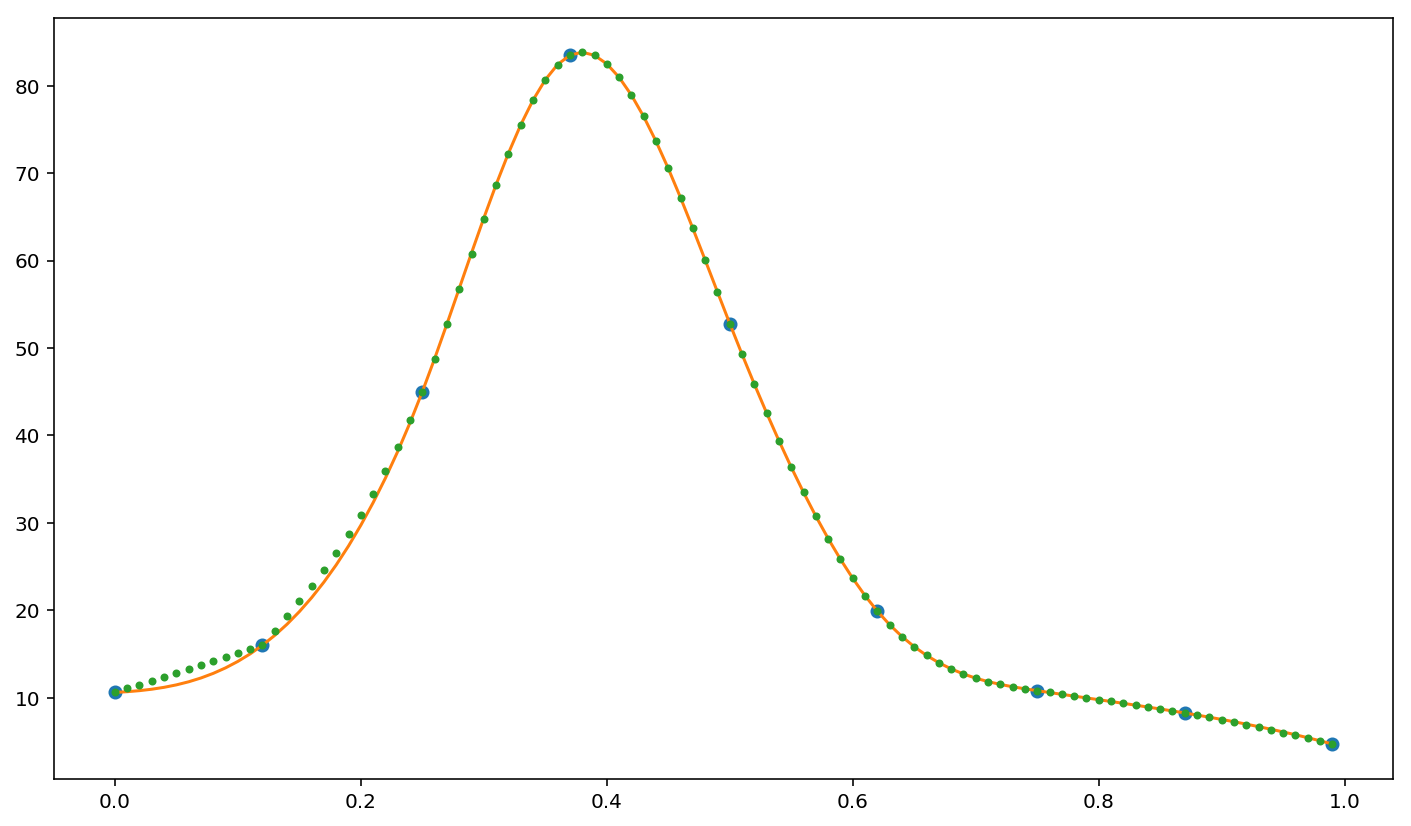

In [6]:
plt.figure(figsize=(12,7))
plt.plot(x, y, 'o')
plt.plot(Xfit, CubicSpline(x,y)(Xfit), '-')
plt.plot(Xfit, Yfit, '.')
plt.show()